In [1]:
import requests
import pandas as pd
import numpy as np
from clustergram import Clustergram
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier

from itertools import count
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
url = 'https://stats.nba.com/stats/leaguegamelog'
headers= {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Referer': 'https://www.nba.com/'}
payload = {
    'Counter': '1000',
    'DateFrom': '',
    'DateTo': '',
    'Direction': 'DESC',
    'LeagueID': '00',
    'PlayerOrTeam': 'T',
    'Season': '1998-99',
    'SeasonType': 'Regular Season',
    'Sorter': 'DATE'}

#T, Playoffs

jsonData = requests.get(url, headers=headers, params=payload).json()


rows = jsonData['resultSets'][0]['rowSet']
columns = jsonData['resultSets'][0]['headers']

df = pd.DataFrame(rows, columns=columns)

In [3]:
url = 'https://stats.nba.com/stats/leaguegamelog'
headers= {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Referer': 'https://www.nba.com/'}
NBA = pd.DataFrame(columns = columns)
for i in range(30):
    season = str(1990+i)+'-'+str(91+i)[-2:]
    payload = {
        'Counter': '1000',
        'DateFrom': '',
        'DateTo': '',
        'Direction': 'DESC',
        'LeagueID': '00',
        'PlayerOrTeam': 'T',
        'Season': season,
        'SeasonType': 'Regular Season',
        'Sorter': 'DATE'}

    jsonData = requests.get(url, headers=headers, params=payload).json()
    rows = jsonData['resultSets'][0]['rowSet']
    columns = jsonData['resultSets'][0]['headers']
    df = pd.DataFrame(rows, columns=columns)
    NBA = NBA.append(df, ignore_index=True)

In [135]:
NBA = pd.read_csv('NBA.csv')
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70082 entries, 0 to 70081
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          70082 non-null  int64  
 1   TEAM_ID            70082 non-null  int64  
 2   TEAM_ABBREVIATION  70082 non-null  object 
 3   TEAM_NAME          70082 non-null  object 
 4   GAME_ID            70082 non-null  int64  
 5   GAME_DATE          70082 non-null  object 
 6   MATCHUP            70082 non-null  object 
 7   WL                 70080 non-null  object 
 8   MIN                70082 non-null  int64  
 9   FGM                70082 non-null  int64  
 10  FGA                70082 non-null  int64  
 11  FG_PCT             70080 non-null  float64
 12  FG3M               70082 non-null  int64  
 13  FG3A               70082 non-null  int64  
 14  FG3_PCT            70017 non-null  float64
 15  FTM                70082 non-null  int64  
 16  FTA                700

In [157]:
df1 = NBA.drop(['TEAM_ID','TEAM_NAME','GAME_ID',
                'GAME_DATE','MATCHUP','WL','MIN','PLUS_MINUS',
                'VIDEO_AVAILABLE'], axis=1)

In [158]:
df1.head()

SEASON_ID TEAM_ABBREVIATION  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
0      21990               WAS   39   78   0.500     0     1    0.000    9   
1      21990               MIN   37   90   0.411     3     9    0.333   12   
2      21990               SAC   39   81   0.481     6     9    0.667   21   
3      21990               LAC   39   91   0.429     5    12    0.417   18   
4      21990               CLE   47   89   0.528     3    11    0.273   26   

   FTA  ...  OREB  DREB  REB  AST  STL  BLK  TOV  PF  PTS  era  
0   14  ...     7    32   39   21    3    1   17  16   87  90s  
1   18  ...    12    25   37   22    8    3    9  15   89  90s  
2   25  ...    10    31   41   27   11    9   22  20  105  90s  
3   24  ...    15    31   46   26   10    8   18  22  101  90s  
4   34  ...     9    39   48   36    9    7   13  20  123  90s  

[5 rows x 21 columns]

In [159]:
df1['Year'] = df1['SEASON_ID'].astype(str).str[1:].astype(int)
df2 =  df1.drop(['SEASON_ID','TEAM_ABBREVIATION'],axis=1).groupby(['Year']).mean()
df2 = df2.reset_index(level=0)

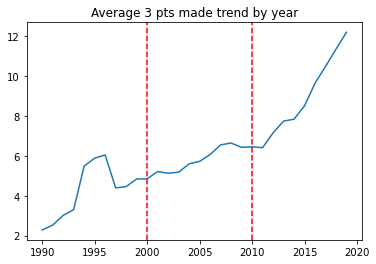

In [5]:
plt.plot(df2['Year'], df2['FG3M'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average 3 pts made trend by year')
plt.show()

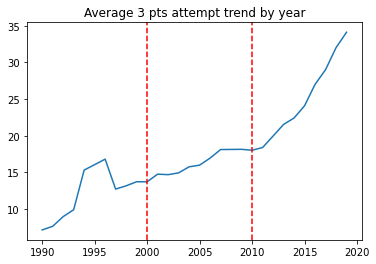

In [6]:
plt.plot(df2['Year'], df2['FG3A'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average 3 pts attempt trend by year')
plt.show()

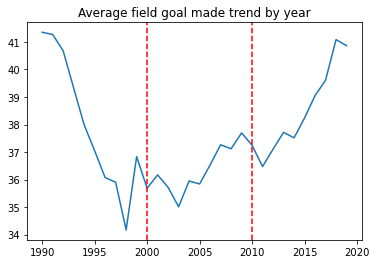

In [7]:
plt.plot(df2['Year'], df2['FGM'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average field goal made trend by year')
plt.show()

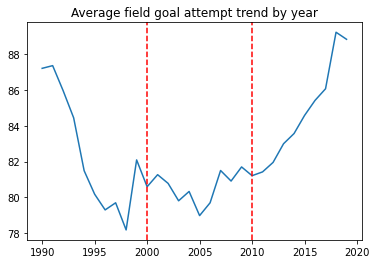

In [8]:
plt.plot(df2['Year'], df2['FGA'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average field goal attempt trend by year')
plt.show()

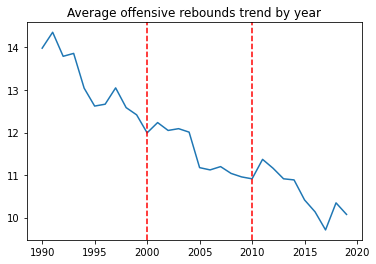

In [9]:
plt.plot(df2['Year'], df2['OREB'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average offensive rebounds trend by year')
plt.show()

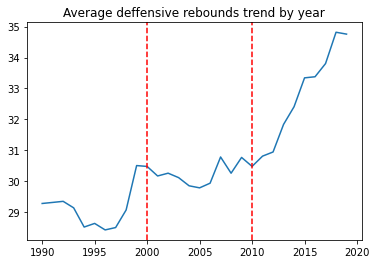

In [10]:
plt.plot(df2['Year'], df2['DREB'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average deffensive rebounds trend by year')
plt.show()

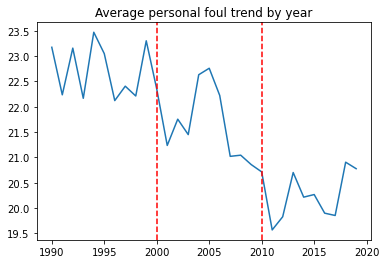

In [130]:
plt.plot(df2['Year'], df2['PF'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average personal foul trend by year')
plt.show()

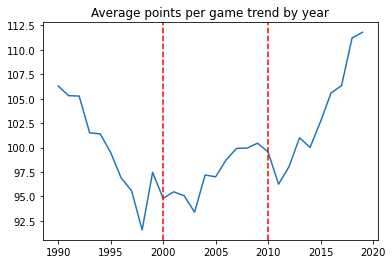

In [131]:
plt.plot(df2['Year'], df2['PTS'])
plt.axvline(x=2000,color='r', linestyle='--')
plt.axvline(x=2010,color='r', linestyle='--')
plt.title('Average points per game trend by year')
plt.show()

In [139]:
conditions = [
    (NBA['SEASON_ID'].astype(str).str[-2] == '9'),
    (NBA['SEASON_ID'].astype(str).str[-2] == '0'),
    (NBA['SEASON_ID'].astype(str).str[-2] == '1')
    ]

labels = ['90s','00s','10s']
NBA['era'] = np.select(conditions, labels)
NBA

SEASON_ID     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
0          21990  1610612764               WAS      Washington Bullets   
1          21990  1610612750               MIN  Minnesota Timberwolves   
2          21990  1610612758               SAC        Sacramento Kings   
3          21990  1610612746               LAC    Los Angeles Clippers   
4          21990  1610612739               CLE     Cleveland Cavaliers   
...          ...         ...               ...                     ...   
70077      22019  1610612738               BOS          Boston Celtics   
70078      22019  1610612740               NOP    New Orleans Pelicans   
70079      22019  1610612761               TOR         Toronto Raptors   
70080      22019  1610612746               LAC             LA Clippers   
70081      22019  1610612747               LAL      Los Angeles Lakers   

        GAME_ID   GAME_DATE      MATCHUP WL  MIN  FGM  ...  REB  AST  STL  \
0      29001100  1991-04-21  WAS vs. MIN  L  240   39  ...   39   21    3   
1      29001100  1991-04-21    MIN @ WAS  W  240   37  ...   37   22    8   
2      29001106  1991-04-21  SAC vs. LAC  W  240   39  ...   41   27   11   
3      29001106  1991-04-21    LAC @ SAC  L  240   39  ...   46   26   10   
4      29001097  1991-04-21  CLE vs. PHL  W  240   47  ...   48   36    9   
...         ...         ...          ... ..  ...  ...  ...  ...  ...  ...   
70077  21900008  2019-10-23    BOS @ PHI  L  240   33  ...   41   18    4   
70078  21900001  2019-10-22    NOP @ TOR  L  265   43  ...   53   30    4   
70079  21900001  2019-10-22  TOR vs. NOP  W  265   42  ...   57   23    7   
70080  21900002  2019-10-22  LAC vs. LAL  W  240   42  ...   45   24    8   
70081  21900002  2019-10-22    LAL @ LAC  L  240   37  ...   41   20    4   

       BLK  TOV  PF  PTS  PLUS_MINUS  VIDEO_AVAILABLE  era  
0        1   17  16   87          -2                0  90s  
1        3    9  15   89           2                0  90s  
2        9   22  20  105           4                0  90s  
3        8   18  22  101          -4                0  90s  
4        7   13  20  123          13                0  90s  
...    ...  ...  ..  ...         ...              ...  ...  
70077    2   11  29   93         -14                1  10s  
70078    9   19  34  122          -8                1  10s  
70079    3   17  24  130           8                1  10s  
70080    5   14  25  112          10                1  10s  
70081    7   15  24  102         -10                1  10s  

[70082 rows x 30 columns]

In [160]:
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['SEA'],'OKC')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['NJN'],'BKN')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['VAN'],'MEM')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['CHH'],'CHA')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['NOH'],'NOP')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['NOK'],'NOP')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['PHL'],'PHI')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['GOS'],'GSW')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['SAN'],'SAS')
NBA['TEAM_ABBREVIATION'] = NBA['TEAM_ABBREVIATION'].replace(['UTH'],'UTA')

In [161]:
df1 = NBA.drop(['SEASON_ID','TEAM_ID','TEAM_NAME','GAME_ID',
                'GAME_DATE','MATCHUP','WL','MIN','PLUS_MINUS',
                'VIDEO_AVAILABLE'], axis=1)

df1.columns

Index(['TEAM_ABBREVIATION', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'era'],
      dtype='object')

In [5]:
#for i in range(18):
#    df1[df1.columns[i+2]] = df1[df1.columns[i+2]].astype(str).astype(float)

In [162]:
df2 = df1.groupby(['era','TEAM_ABBREVIATION']).mean()
df2.reset_index(inplace=True)
df2_centered= df2.drop(['era','TEAM_ABBREVIATION'],axis=1) - df2.drop(['era','TEAM_ABBREVIATION'],axis=1).mean(axis=0)

In [163]:
df2

era TEAM_ABBREVIATION        FGM        FGA    FG_PCT      FG3M  \
0   00s               ATL  35.726829  79.981707  0.447307  5.062195   
1   00s               BKN  34.853659  79.241463  0.440507  5.530488   
2   00s               BOS  35.515854  78.463415  0.454118  6.793902   
3   00s               CHA  35.455793  80.160061  0.443726  5.137195   
4   00s               CHI  35.870732  81.576829  0.440834  5.215854   
..  ...               ...        ...        ...       ...       ...   
84  90s               SAC  38.223350  83.940355  0.456685  4.206853   
85  90s               SAS  38.167513  80.710660  0.473448  3.576142   
86  90s               TOR  35.941799  81.653439  0.441569  5.359788   
87  90s               UTA  38.423858  78.738579  0.489250  2.975888   
88  90s               WAS  38.953046  83.903553  0.465638  3.409898   

         FG3A   FG3_PCT        FTM        FTA    FT_PCT       OREB       DREB  \
0   14.448780  0.344162  18.837805  24.841463  0.756889  12.082927  29.507317   
1   15.997561  0.339074  19.062195  25.262195  0.756032  10.926829  29.996341   
2   18.914634  0.357055  19.637805  25.957317  0.754689  10.418293  30.193902   
3   14.501524  0.353319  18.928354  25.806402  0.731340  11.769817  29.512195   
4   14.490244  0.356582  18.010976  24.214634  0.743072  11.867073  30.662195   
..        ...       ...        ...        ...       ...        ...        ...   
84  12.010152  0.350952  19.593909  26.906091  0.728478  13.303299  28.795685   
85  10.191624  0.332156  20.228426  27.502538  0.734301  12.766497  31.233503   
86  15.108466  0.348913  18.335979  24.917989  0.735169  13.764550  27.809524   
87   8.270305  0.352258  22.854061  29.615482  0.772240  11.767766  29.694162   
88  10.195431  0.314328  18.350254  25.104061  0.732990  12.827411  28.412437   

          REB        AST       STL       BLK        TOV         PF         PTS  
0   41.590244  20.248780  7.510976  4.925610  15.256098  22.100000   95.353659  
1   40.923171  22.204878  7.501220  4.421951  14.386585  22.320732   94.300000  
2   40.612195  21.303659  8.419512  4.459756  15.396341  23.053659   97.463415  
3   41.282012  21.574695  8.077744  5.059451  14.769817  22.053354   94.977134  
4   42.529268  21.741463  7.409756  5.019512  15.507317  22.914634   94.968293  
..        ...        ...       ...       ...        ...        ...         ...  
84  42.098985  23.378173  8.252538  5.230964  16.190355  23.571066  100.247462  
85  44.000000  23.402284  7.664975  6.390863  15.173858  21.717005  100.139594  
86  41.574074  22.142857  8.838624  6.714286  16.206349  23.410053   95.579365  
87  41.461929  26.230964  8.517766  5.035533  15.057107  23.697970  102.677665  
88  41.239848  23.153553  7.997462  4.869289  15.516497  23.062183   99.666244  

[89 rows x 20 columns]

In [19]:
df2_drop_team=df2.drop(['TEAM_ABBREVIATION'],axis=1)

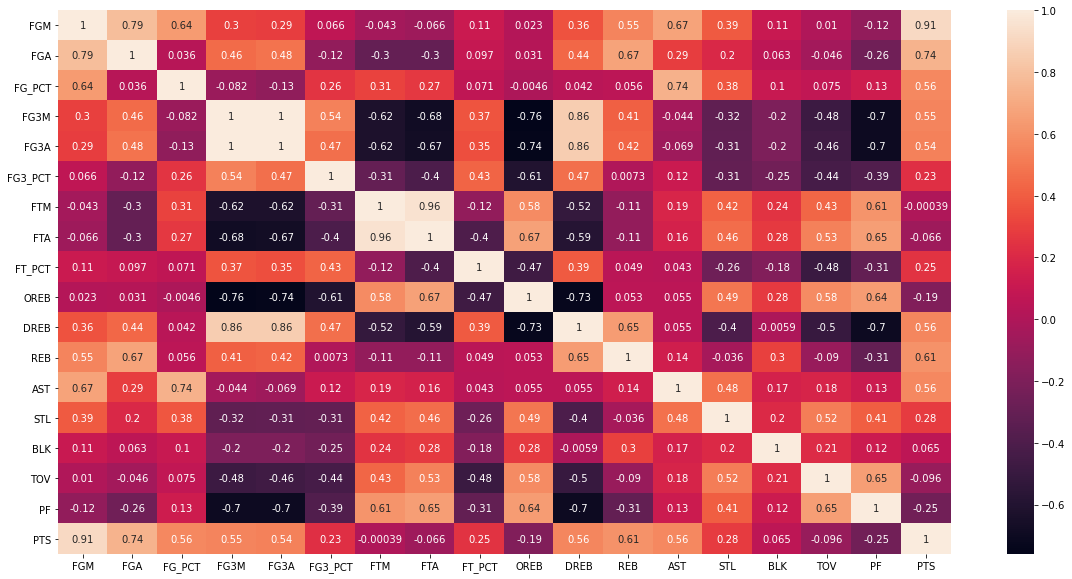

In [25]:
plt.figure(figsize=(20, 10))
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Text(0.5, 1.01, 'NBA')

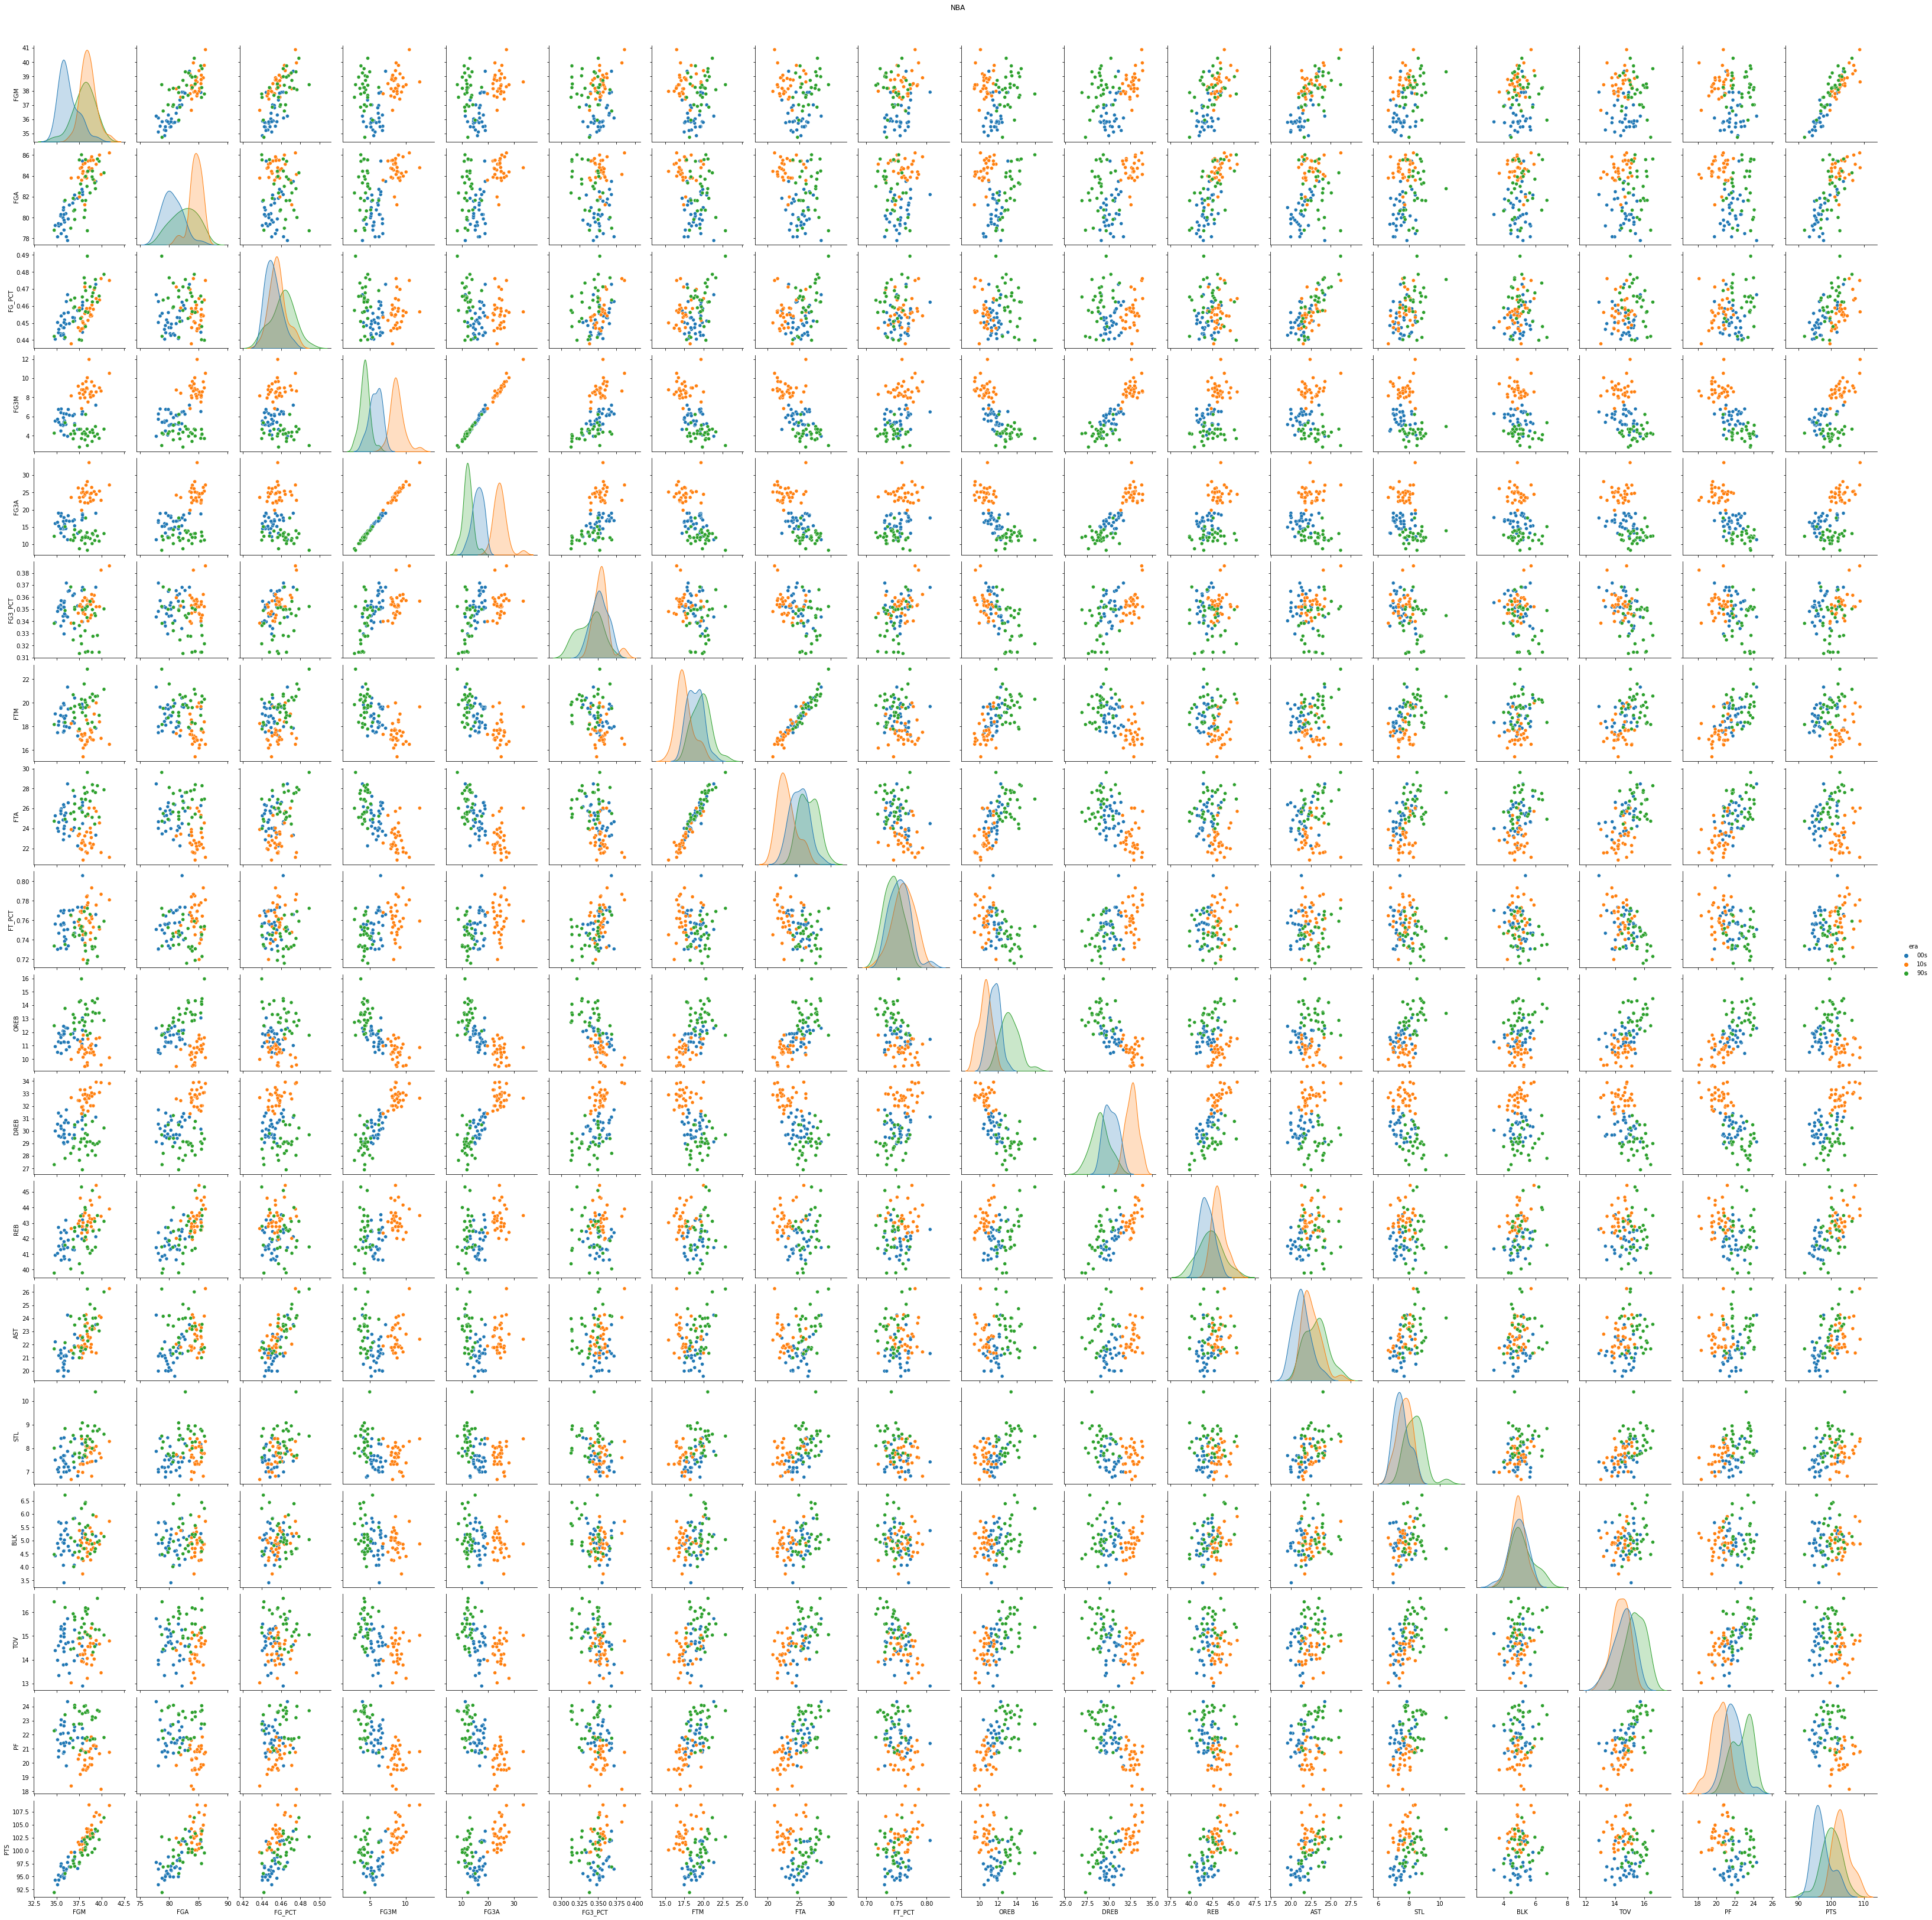

In [250]:
g = sns.pairplot(df2, hue="era")
g.fig.suptitle("NBA", y=1.01)

Text(0.5, 1.01, 'NBA')

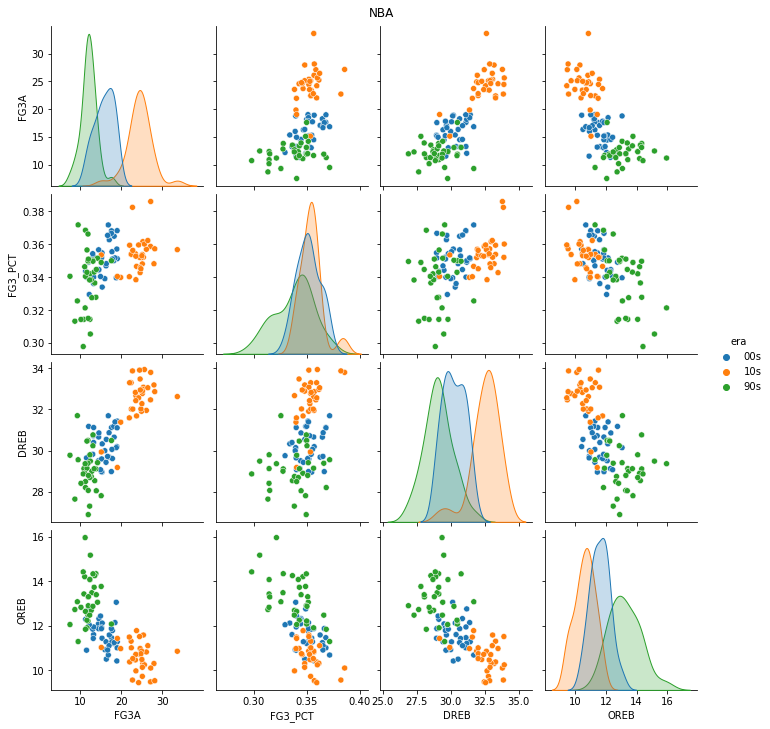

In [144]:
g = sns.pairplot(df2[['FG3A','FG3_PCT','DREB','OREB','era']], hue="era")
g.fig.suptitle("NBA", y=1.01)

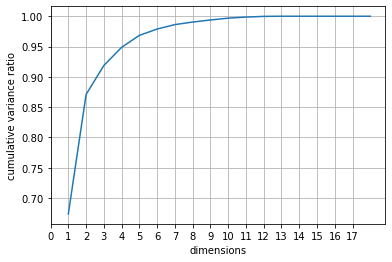

In [26]:
pca=PCA()
pca.fit(df2_centered)
cumsum=np.cumsum(pca.explained_variance_ratio_)
v = {'index': range(1,len(cumsum)+1), 'cumsum': cumsum}
variance_ratio = pd.DataFrame(data=v)
plt.plot(variance_ratio['index'],variance_ratio['cumsum'])
plt.xlabel('dimensions')
plt.ylabel('cumulative variance ratio')
plt.xticks(range(len(variance_ratio)))
plt.grid()
plt.show()

In [26]:
pca=PCA(n_components=2)
df2_centered= df2.drop(['era','TEAM_ABBREVIATION'], axis=1) - df2.drop(['era','TEAM_ABBREVIATION'], axis=1).mean(axis=0)
pca.fit(df2_centered)

PCA(n_components=2)

In [27]:
pca.components_.T
lut = dict(zip(df2['era'].unique(), "rbg"))
row_col=df2['era'].map(lut)

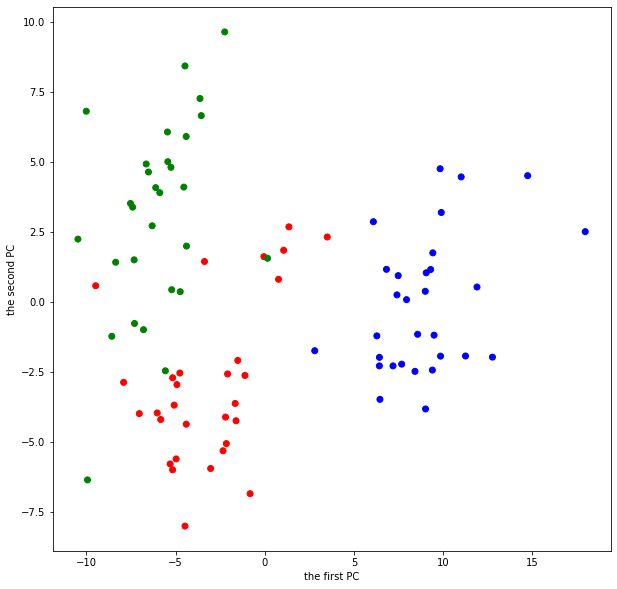

In [28]:
fig = plt.figure(figsize=(10,10))
X_pca=pca.transform(df2_centered)
plt.scatter(X_pca[:,0],X_pca[:,1],c=row_col)
plt.xlabel('the first PC')
plt.ylabel('the second PC')
plt.show()

In [226]:
pca=PCA(n_components=3)

df2_centered= df2.drop(['era','TEAM_ABBREVIATION'], axis=1) - df2.drop(['era','TEAM_ABBREVIATION'], axis=1).mean(axis=0)
fit = pca.fit(df2_centered)
fit.explained_variance_ratio_

array([0.67373384, 0.1972029 , 0.04775496])

In [227]:
X_pca=pca.transform(df2_centered)
#ax = plt.axes(projection='3d')
#ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2],c=row_col,alpha=1)
#ax.set_title("3d")

In [228]:
def rotate(angle):
     ax.view_init(azim=angle)
angle = 3

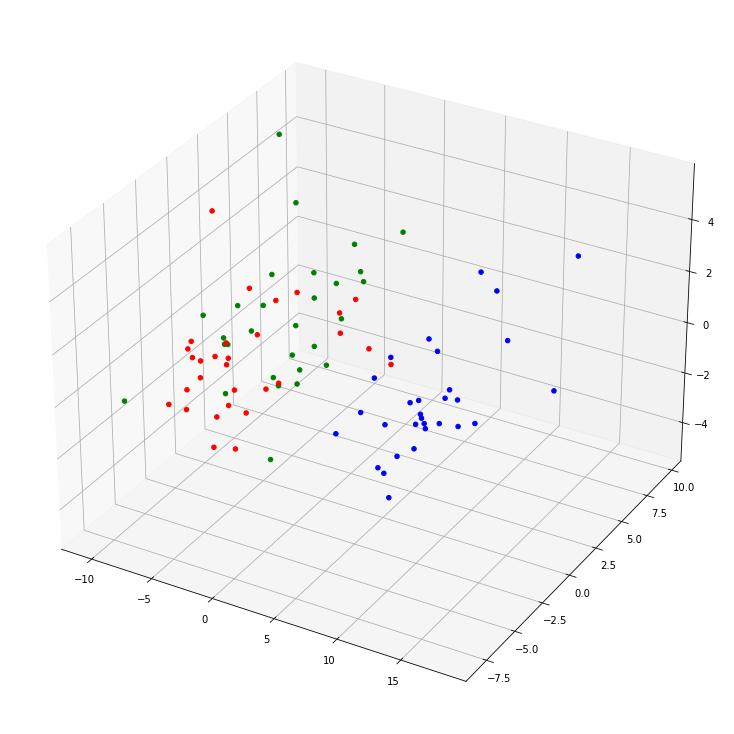

In [229]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
plot_geeks = ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2],c=row_col,alpha=1)

In [230]:
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('pca.gif', writer=animation.PillowWriter(fps=20))

In [202]:
model = ExtraTreesClassifier(random_state=0)
model.fit(df2_centered, df2['era'])
#print(model.feature_importances_)

ExtraTreesClassifier(random_state=0)

In [205]:
feature_importances = pd.DataFrame({'feature':df2_centered.columns,'importances':model.feature_importances_})
f = feature_importances.sort_values('importances', ascending=False).transpose()
f.to_csv('f.csv')

In [31]:
df10 = (df2[['FG3A','DREB','OREB']] - df2[['FG3A','DREB','OREB']].mean())/ df2[['FG3A','DREB','OREB']].std()
df10['era'] = df2['era']

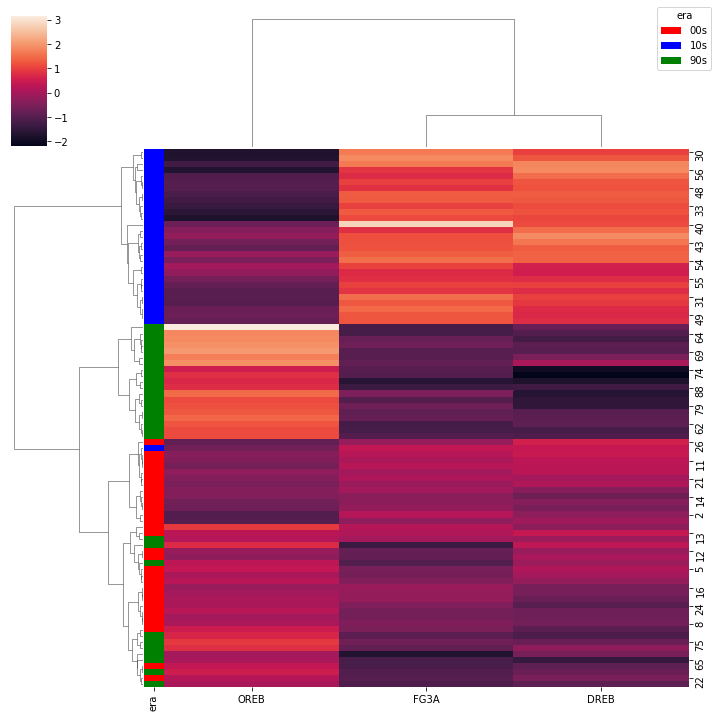

In [32]:
for i in range(3):
    df10[df10.columns[i]] = df10[df10.columns[i]].astype(str).astype(float)
lut = dict(zip(df10['era'].unique(), "rbg"))
X=df10.drop(['era'],axis=1)
X=df10.iloc[:,0:3]
row_col=df10['era'].map(lut)
g = sns.clustermap(X, row_colors=row_col, method="ward")
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='era',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

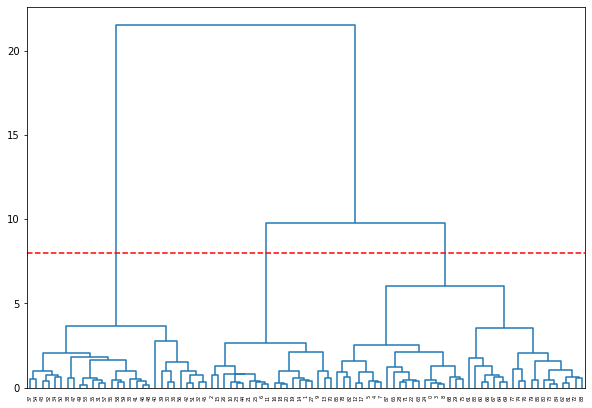

In [235]:
df10 = (df2[['FG3A','FG3M','DREB','OREB']] - df2[['FG3A','FG3M','DREB','OREB']].mean())/ df2[['FG3A','FG3M','DREB','OREB']].std()
df10['era'] = df2['era']
linked = linkage(df10.drop(['era'],axis=1), 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

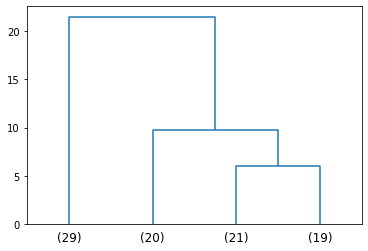

In [236]:
dendrogram(linked,
           p=4, 
           truncate_mode='lastp',
           color_threshold=-1,
           orientation='top',
           show_leaf_counts=True
           )
plt.show()

In [196]:
feature_cols = ['FG3A','DREB','OREB']
X = df2[feature_cols]
y = df2['era']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [199]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


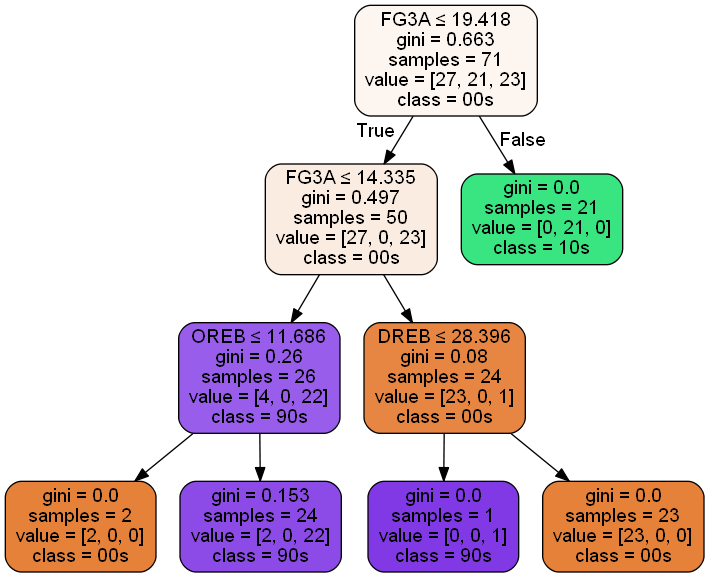

In [200]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['00s','10s','90s'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [64]:
df3 = NBA.drop(['TEAM_ID','TEAM_NAME','GAME_ID','SEASON_ID',
                'GAME_DATE','MATCHUP','MIN','PLUS_MINUS',
                'VIDEO_AVAILABLE'], axis=1)

conditions = [
    (df3['WL'] == 'W'),
    (df3['WL'] == 'L')
    ]

labels = [1,0]
df3['Win'] = np.select(conditions, labels)
df3

df4 = df3.groupby(['TEAM_ABBREVIATION','era']).mean()
df4 = df4.reset_index()

In [78]:
df5 = df4.loc[df4['era'] == '90s']
df5 = df5.reset_index()
df6=df5['Win'].idxmax()
df5.iloc[27,]

index                        85
TEAM_ABBREVIATION           UTA
era                         90s
FGM                   38.423858
FGA                   78.738579
FG_PCT                  0.48925
FG3M                   2.975888
FG3A                   8.270305
FG3_PCT                0.352258
FTM                   22.854061
FTA                   29.615482
FT_PCT                  0.77224
OREB                  11.767766
DREB                  29.694162
REB                   41.461929
AST                   26.230964
STL                    8.517766
BLK                    5.035533
TOV                   15.057107
PF                     23.69797
PTS                  102.677665
Win                    0.687817
Name: 27, dtype: object

In [79]:
df5 = df4.loc[df4['era'] == '10s']
df5 = df5.reset_index()
df6=df5['Win'].idxmax()
df5.iloc[df6,]

index                        78
TEAM_ABBREVIATION           SAS
era                         10s
FGM                   39.948298
FGA                   84.138714
FG_PCT                 0.476067
FG3M                    8.65826
FG3A                  22.716267
FG3_PCT                0.382349
FTM                   16.988651
FTA                   21.575032
FT_PCT                 0.786627
OREB                   9.562421
DREB                  33.871375
REB                   43.433796
AST                   24.063052
STL                    7.600252
BLK                    5.271122
TOV                   13.448928
PF                    18.143758
PTS                  105.543506
Win                    0.682219
Name: 26, dtype: object

In [80]:
df5 = df4.loc[df4['era'] == '00s']
df5 = df5.reset_index()
df6=df5['Win'].idxmax()
df5.iloc[df6,]

index                       77
TEAM_ABBREVIATION          SAS
era                        00s
FGM                  36.087805
FGA                  78.162195
FG_PCT                0.462615
FG3M                  6.267073
FG3A                 16.841463
FG3_PCT               0.371663
FTM                  17.982927
FTA                  24.667073
FT_PCT                0.730543
OREB                 10.685366
DREB                 31.692683
REB                  42.378049
AST                  21.119512
STL                   6.996341
BLK                    5.67439
TOV                  13.803659
PF                        19.8
PTS                   96.42561
Win                    0.69878
Name: 26, dtype: object

In [28]:
df4 = NBA.drop(['TEAM_NAME','GAME_ID','TEAM_ID',
                'GAME_DATE','MATCHUP','WL','MIN',#'PLUS_MINUS',
                'VIDEO_AVAILABLE'], axis=1)
df5 = df4.groupby(['SEASON_ID','TEAM_ABBREVIATION']).mean().reset_index()
df6 = df5.loc[df5['TEAM_ABBREVIATION']=='CHI']
CHI = df6.iloc[:10,]
df6 = df5.loc[df5['TEAM_ABBREVIATION']=='LAL']
LAL= df6.iloc[10:20,]
df6 = df5.loc[df5['TEAM_ABBREVIATION']=='GSW']
GSW= df6.iloc[20:,]


In [66]:
CHI = df4.loc[df4['TEAM_ABBREVIATION']=='CHI']
CHI = CHI.loc[CHI['SEASON_ID']<22000]
LAL = df4.loc[df4['TEAM_ABBREVIATION']=='LAL']
LAL = LAL.loc[(LAL['SEASON_ID']>21999) & (LAL['SEASON_ID']<22010)]
GSW = df4.loc[df4['TEAM_ABBREVIATION']=='GSW']
GSW = GSW.loc[GSW['SEASON_ID']>22009]

CHI['team'] = 'CHI'
LAL['team'] = 'LAL'
GSW['team'] = 'GSW'

team
CHI    AxesSubplot(0.125,0.125;0.775x0.755)
GSW    AxesSubplot(0.125,0.125;0.775x0.755)
LAL    AxesSubplot(0.125,0.125;0.775x0.755)
Name: FG3A, dtype: object

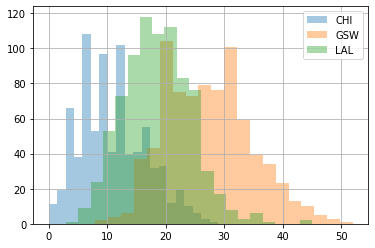

In [67]:
best3 = pd.concat([CHI,LAL,GSW])
best3.groupby("team").FG3A.hist(alpha=0.4,legend=True,bins=20)

team
CHI    AxesSubplot(0.125,0.125;0.775x0.755)
GSW    AxesSubplot(0.125,0.125;0.775x0.755)
LAL    AxesSubplot(0.125,0.125;0.775x0.755)
Name: FG3M, dtype: object

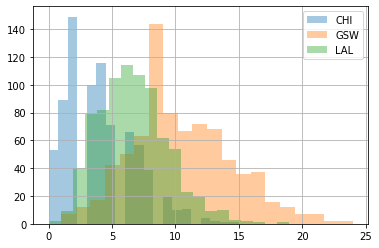

In [68]:
best3.groupby("team").FG3M.hist(alpha=0.4,legend=True,bins=20)

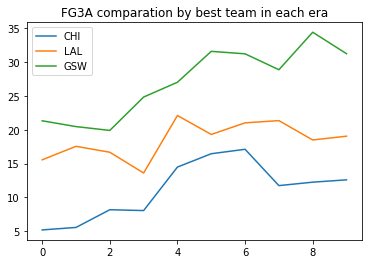

In [105]:
x = range(10)
CHI = CHI.groupby('SEASON_ID').mean()
LAL = LAL.groupby('SEASON_ID').mean()
GSW = GSW.groupby('SEASON_ID').mean()
  
# plot lines
plt.plot(x, CHI['FG3A'], label = "CHI")
plt.plot(x, LAL['FG3A'], label = "LAL")
plt.plot(x, GSW['FG3A'], label = "GSW")
plt.title('FG3A comparation by best team in each era')
plt.legend()
plt.show()

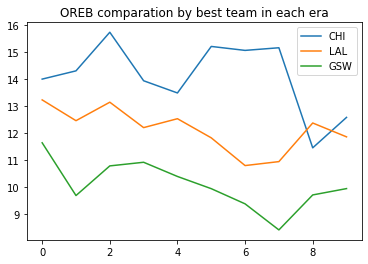

In [107]:
plt.plot(x, CHI['OREB'], label = "CHI")
plt.plot(x, LAL['OREB'], label = "LAL")
plt.plot(x, GSW['OREB'], label = "GSW")
plt.title('OREB comparation by best team in each era')
plt.legend()
plt.show()

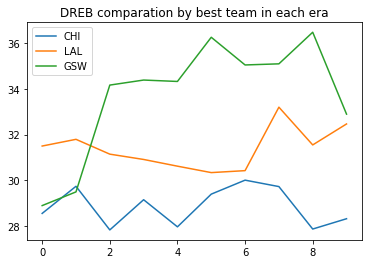

In [108]:
plt.plot(x, CHI['DREB'], label = "CHI")
plt.plot(x, LAL['DREB'], label = "LAL")
plt.plot(x, GSW['DREB'], label = "GSW")
plt.title('DREB comparation by best team in each era')
plt.legend()
plt.show()